# **03 - DataVisualization**

## Objectives

* Answer Business requirement 1:
  * The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train

## Outputs

* Avarage and variability of images per label plot.
* Plot to distinguish the contrast between healthy cherry leaves from leaves with powdery mildew.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No additional comments. 



---

# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import joblib

from matplotlib.image import imread

---

# Set Data directory variables

## Change working directory

* Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

* The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspace/Mildew-Detection-in-Cherry-Leaves'

## Input directory variables

In [3]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_data_dir = data_dir + '/train'
val_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

## Output directory variables

In [4]:
if 'outputs' not in os.listdir(current_dir):
    os.makedirs(name='outputs')

def create_output_dir(version_index):
    while True:
        try:
            os.makedirs(name=f'outputs/Version{version_index}')
            return f'outputs/Version{version_index}'
        except:
            version_index += 1
version_output = create_output_dir(1)
print(f'Current output folder is {version_output}')

Current output folder is outputs/Version2


## Data label names variables

In [5]:
labels = os.listdir(train_data_dir)
print(f'Datalabels are {labels}')

Datalabels are ['healthy', 'powdery_mildew']


---

# Labels Montage

## Create an image montage with sample from each label

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [6]:
import itertools
import random
from matplotlib.image import imread

Sample data from label: healthy


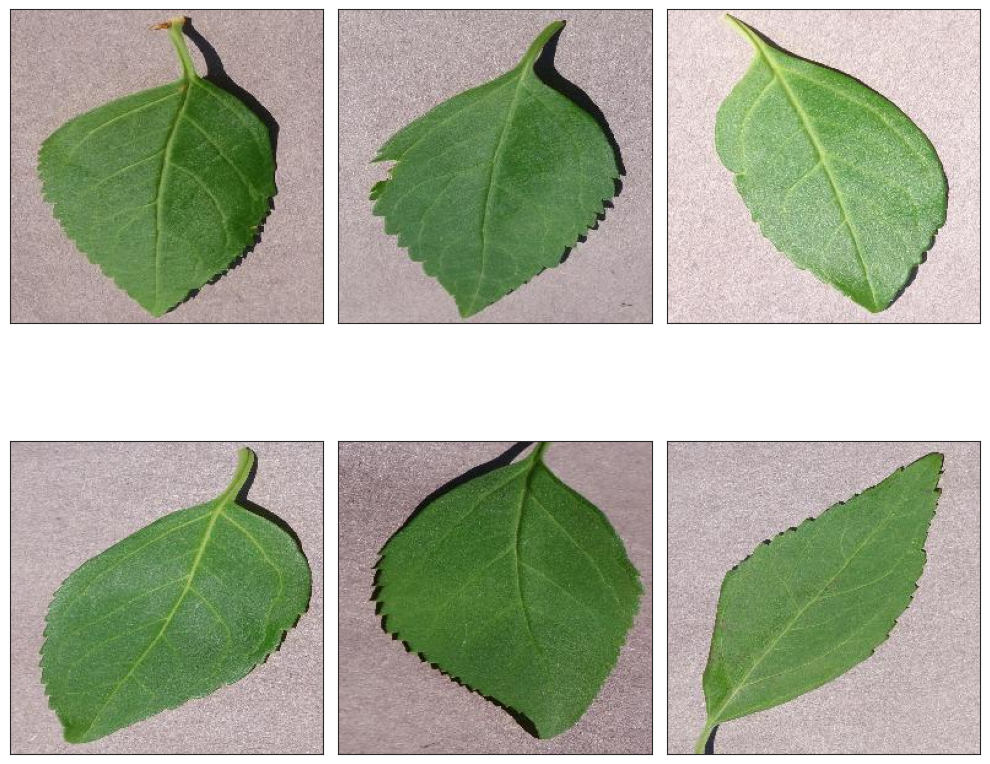

Sample data from label: powdery_mildew


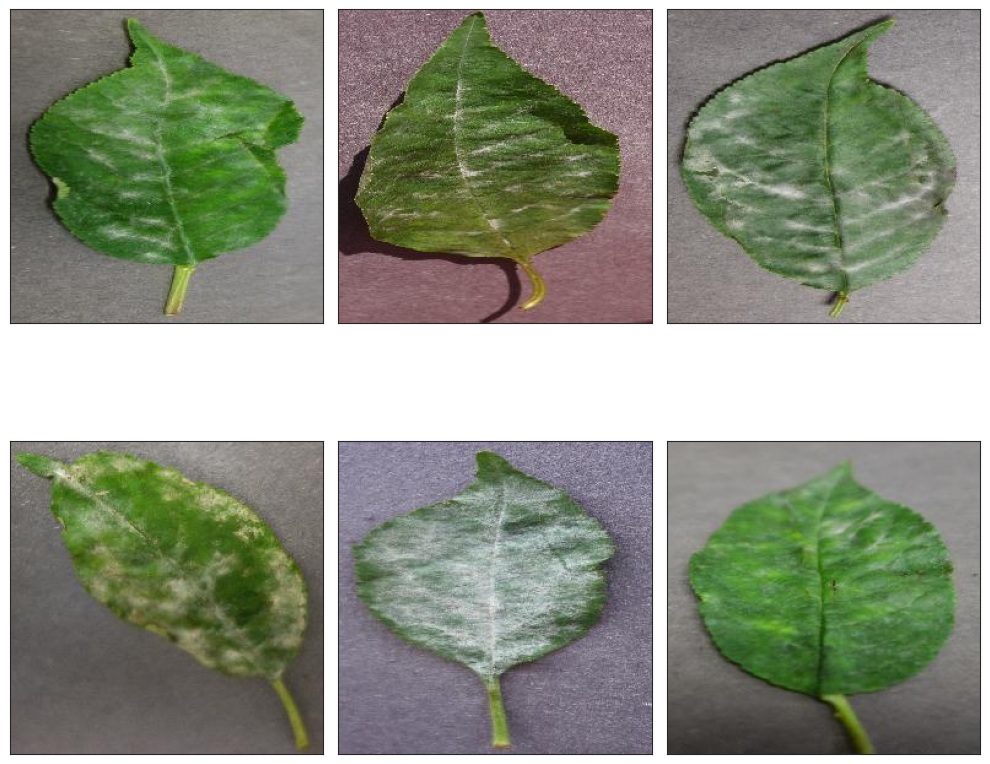

In [7]:
montage_rows = 2
montage_cols = 3
figsize=(10,10)

sns.set_style("white")
labels = os.listdir(train_data_dir)

for label in labels:
    print(f'Sample data from label: {label}')
    imgs_list = os.listdir(train_data_dir + '/' + label)
    imgs_sample = random.sample(imgs_list, montage_rows * montage_cols)

    # create list of axes indices based on montage_rows and montage_cols
    pos_index = []
    for i in range(0, montage_rows):
        for j in range(0, montage_cols):
            pos_index.append([i, j])

    # create a Figure and display images
    fig, axes = plt.subplots(nrows=montage_rows,ncols=montage_cols, figsize=figsize)
    for k in range(0, len(imgs_sample)):
        img = imread(train_data_dir + '/' + label + '/' + imgs_sample[k], 0)
        img_shape = img.shape
        axes[pos_index[k][0], pos_index[k][1]].imshow(img)
        axes[pos_index[k][0], pos_index[k][1]].set_xticks([])
        axes[pos_index[k][0], pos_index[k][1]].set_yticks([])
    plt.tight_layout()
    plt.show()
    

---

# Image Avarage and Variability

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

In [13]:
from tensorflow.keras.preprocessing import image

images_amount = 100

image_array, label_array = np.array([], dtype='int'), np.array([], dtype='object')

for label in labels:
  
  imgs_list = os.listdir(train_data_dir + '/' + label)
  imgs_sample = random.sample(imgs_list, images_amount)
  print(imgs_sample)
  for image_sample in imgs_sample:
    img = image.load_img(train_data_dir + '/' + label + '/' + image_sample)
    if image.img_to_array(img).max() > 1: 
      img_norm = image.img_to_array(img) / 255
    else: 
      img_norm = image.img_to_array(img)
           
    image_array = np.append(image_array, img_norm).reshape(-1, img_norm.shape[0], img_norm.shape[1], img_norm.shape[2])
    label_array = np.append(label_array, label)



['bbf73155-4f12-41a1-b087-38b078e646a1___JR_HL 9592_180deg.JPG', '67c8172e-1360-4ee8-8e44-3e31cd381e53___JR_HL 9466.JPG', 'bcbbda77-7534-484c-8f5f-d913a370714a___JR_HL 4302_flipTB.JPG', '9d9363f1-b9cc-4c44-8225-aa6734763c3c___JR_HL 9579.JPG', '35457722-0a92-4019-906e-5f7933f326d7___JR_HL 4056_180deg.JPG', 'de0e3d2a-9be2-4f7d-98d1-9218ca397c33___JR_HL 4263.JPG', '085e9f8b-9574-4b6f-a8e9-309a35c94b25___JR_HL 9755_180deg.JPG', 'ab6b65e2-f258-49cc-a0f4-7164023d43a6___JR_HL 4254.JPG', '24b19cb2-3c70-4ce7-9001-e2a1af47d5f2___JR_HL 4261.JPG', 'a88cb1e2-0b5b-43ea-9a20-c09951e0a67c___JR_HL 9620.JPG', 'bc47ca90-7317-4ad1-b424-7a346b9905e5___JR_HL 4109.JPG', '376a2a7e-8e4f-42ac-a961-3bffb4d37d53___JR_HL 4237_flipTB.JPG', '76e3298c-998d-4bce-956a-f8812315e1d6___JR_HL 3979_flipTB.JPG', '576e04b9-0ff4-483e-bbd0-185645136964___JR_HL 9429_flipTB.JPG', '8d8affc9-f724-4e95-827c-763d0e3cac90___JR_HL 9894 copy_180deg.JPG', '71226c5a-bc1f-4257-9369-506e32147cea___JR_HL 4169_flipTB.JPG', 'dcdc22d9-37df-421c

==== Label healthy ====
Image Shape: (256, 256, 3)


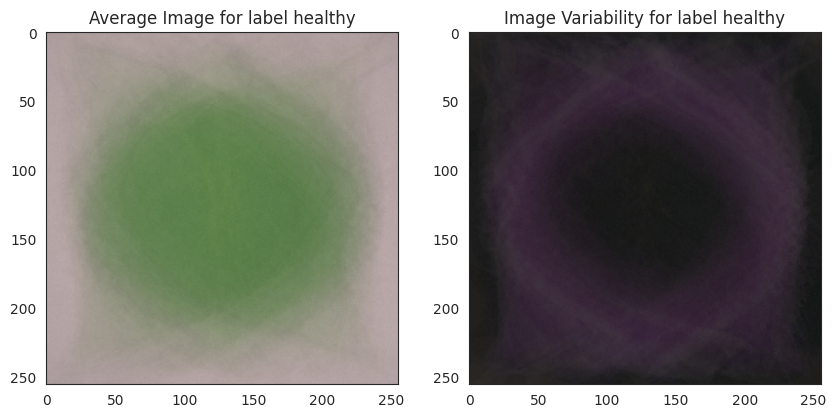



==== Label powdery_mildew ====
Image Shape: (256, 256, 3)


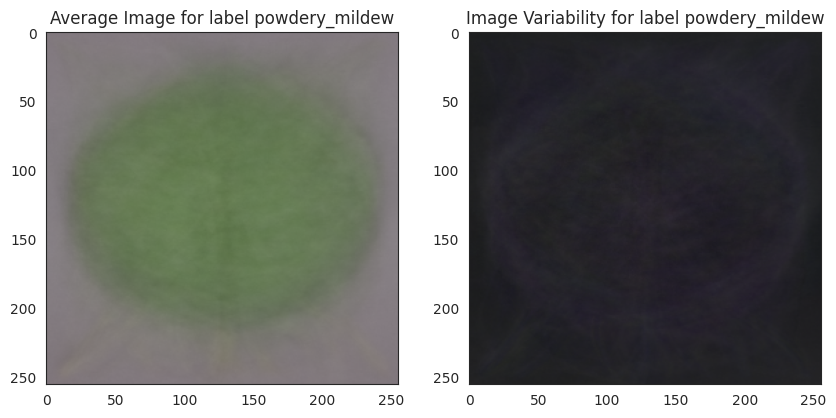

In [14]:
figsize=(10,10)

for label in labels:

    label_array = label_array.reshape(-1,1,1)
    boolean_mask = np.any(label_array==label,axis=1).reshape(-1)
    sample_array = image_array[boolean_mask]

    avg_img = np.mean(sample_array, axis = 0)
    std_img = np.std(sample_array, axis = 0)
    print(f"==== Label {label} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label}")
    axes[1].imshow(std_img, cmap='gray')
    plt.show()
    print("\n")


---

# Label Avarage Differentiation

## Change working directory

Change the working directory from the current folder to /workspace/Mildew-Detection-in-Cherry-Leaves

The output from the cell bellow should be '/workspace/Mildew-Detection-in-Cherry-Leaves'

---

# Conclusions and Next Steps

* Dataset is collected from Kaggle and stored in inputs folder.
* No input data is pushed to github repo
* Next step is data visualization found in 02 - DataVisualization notebook